In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ------------------------------------------------------------------------------------
# We combined all the input *.dat files provided by Anthony Tutu into a single file using
# cat *.dat > TM1_temperature.txt, which we will use to create an ASCII structured file for Aspect.
# The input file has four columns starting from longitude (0 to 360 deg), latitude 
# (-90 to 90 deg), temperature (degrees Celsius), depth (km). We want to convert the tempeartures
# to Kelvin, depths to m, and coordinates to radians. 
# The latitudes and longitudes points are at every degree in a grid such that longitude increases 
# first, then latitude, then depth.
# ------------------------------------------------------------------------------------

outer_radius          = 6371e3

temperature_file_name = np.loadtxt('TM1_temperature.txt')

points_along_longitude   = 360
points_along_latitude    = 181
latitude_points_surface  = np.linspace(-90, 90, points_along_latitude)
longitude_points_surface = np.arange(0, points_along_longitude)

(longitude_surface_grid, latitude_surface_grid) = np.meshgrid(longitude_points_surface, latitude_points_surface)

# Add a slice at the surface along with the temperature distribution given in the file
phi                   = np.concatenate((longitude_surface_grid.flatten(), temperature_file_name[:, 0]))
theta                 = 90 - np.concatenate((latitude_surface_grid.flatten(), temperature_file_name[:, 1]) )
radius                = np.concatenate((outer_radius * np.ones((points_along_longitude*points_along_latitude,)), 
                                       outer_radius - temperature_file_name[:, 3]*1e3 ))
temperature           = np.concatenate((273 * np.ones((points_along_longitude*points_along_latitude,)),
                                        temperature_file_name[:, 2] + 273))

# We sort the input so that radius increases first, then longitude and then co-latitude.
index = np.lexsort((radius, phi, theta))

output_columns = np.column_stack( (radius[index], np.deg2rad(phi[index]), 
                                   np.deg2rad(theta[index]), temperature[index] )) 

In [4]:
header_text = '''# Test data for ascii data initial conditions.
# Only next line is parsed in format: [nx] [ny] [nz] because of keyword "POINTS:"
# POINTS: 10 360 181
# Columns: r phi theta temperature [K]'''

In [5]:
with open('../upper_mantle_TM1.txt', 'w') as f:
    f.write(header_text + "\n")
    np.savetxt(f, output_columns, fmt='%.4e')
    f.close

In [3]:
np.unique(6371e3 - radius)

array([     0.,  10000.,  20000.,  40000.,  60000., 100000., 150000.,
       200000., 250000., 300000.])

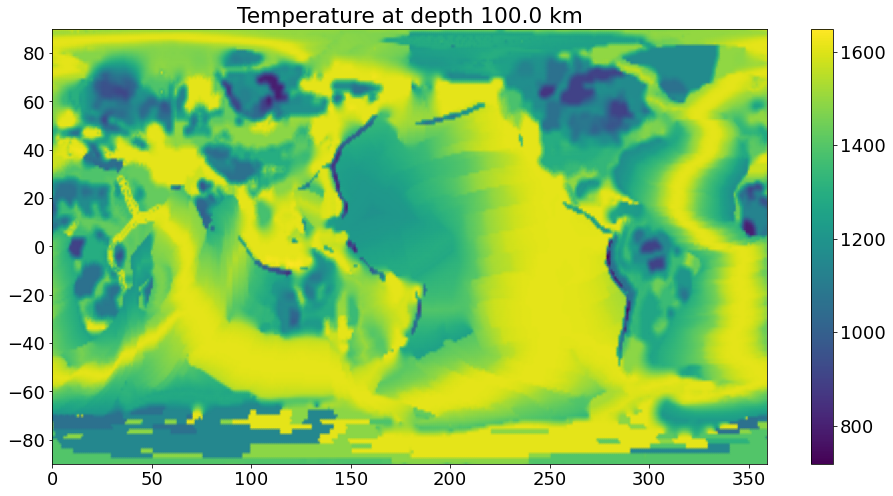

In [5]:
# We can plot here to check if temperatures look okay
depth       = 6371e3 - radius
depth_layer = 100e3

plt.rcParams.update({'font.size': 18})

temperature_layer  = temperature[depth == depth_layer]
temperature_reshap = np.reshape(temperature_layer, (points_along_latitude, points_along_longitude) ); 

(fig, (ax1) )      =  plt.subplots(1, 1, figsize=(16, 8))

CB = ax1.pcolormesh(longitude_points_surface, latitude_points_surface, temperature_reshap, shading='gouraud')
fig.colorbar(CB, ax=ax1)
ax1.set_title ("Temperature at depth %s km" %(depth_layer/1e3) )

plt.show()

In [32]:
10*360*181


651600